In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from django.db import models
#from pygments.lexers import get_all_lexers
#from pygments.styles import get_all_styles 

In [2]:
sampleData = pd.read_csv('SimulatedInputdata.csv')

In [3]:
#Change DateofForm into datetime format
sampleData.DateofForm = pd.to_datetime(sampleData.DateofForm)

# Column assumptions
  - D3 = patient ID
  - DateofForm = Date the form was submitted
  - D21 = weight
### Mental Health
  - D23a = Depression
  - D23b = Anxiety
  - D23c = Enthusiasm
  - D23d = Mental Fatigue
### Saliva and swallowing
  - D22a  = Saliva
  - D22b = Food variety
  - D22c = Food texture
  - D22d = Amount of food consumed
  - D22e = Supplements
### Breathing
  - D24a = Overall Breathing
  - D24b = Shortness of breath 
  - D24c = Breathing while lying flat
### Appetite and digestive health
  - D25a = Appetite
  - D25b = Nausea
  - D25c = Bloating/Gas
  - D25d = Constipation
### Physical
  - Physical_Fatigue_LL
  - Wasting_LL	
  - Twitching_LL	
  - Cramping_LL	
  - Weakness_LL	
  - Stiffness_LL	
  - Pain_LL
  - Physical_Fatigue_RL
  - Wasting_RL	
  - Twitching_RL	
  - Cramping_RL
  - Weakness_RL	
  - Stiffness_RL	
  - Pain_RL
  - Physical_Fatigue_LA
  - Wasting_LA
  - Twitching_LA	
  - Cramping_LA	
  - Weakness_LA	
  - Stiffness_LA	
  - Pain_LA
  - Physical_Fatigue_RA
  - Wasting_RA	
  - Twitching_RA	
  - Cramping_RA	
  - Weakness_RA	
  - Stiffness_RA	
  - Pain_RA

In [4]:
columns = ['D3', 'DateofForm','D21', 'D22a', 'D22b', 'D22c', 'D22d', 'D22e','D23a', 'D23b', 'D23c', 
           'D23d', 'D24a', 'D24b', 'D24c','D25a', 'D25b', 'D25c', 'D25d', 'Physical_Fatigue_LL', 'Wasting_LL', 
           'Twitching_LL', 'Cramping_LL', 'Weakness_LL', 'Stiffness_LL', 'Pain_LL', 'Physical_Fatigue_RL', 'Wasting_RL', 
           'Twitching_RL', 'Cramping_RL', 'Weakness_RL', 'Stiffness_RL', 'Pain_RL', 'Physical_Fatigue_LA', 'Wasting_LA', 
           'Twitching_LA', 'Cramping_LA', 'Weakness_LA', 'Stiffness_LA', 'Pain_LA', 'Physical_Fatigue_RA', 'Wasting_RA', 
           'Twitching_RA', 'Cramping_RA', 'Weakness_RA', 'Stiffness_RA', 'Pain_RA'] 
sampleData[columns].describe()

,D3,D21,D22a,D22b,D22c,D22d,D22e,D23a,D23b,D23c,...,Weakness_LA,Stiffness_LA,Pain_LA,Physical_Fatigue_RA,Wasting_RA,Twitching_RA,Cramping_RA,Weakness_RA,Stiffness_RA,Pain_RA
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.00000,267.000000
mean,56441.044944,83.022472,51.445693,52.000000,51.988764,50.325843,52.951311,51.202247,48.295880,51.644195,...,50.018727,50.677903,53.082397,48.172285,47.932584,48.782772,49.355805,50.573034,49.29588,49.655431
std,26614.393673,32.050469,29.519967,29.587388,30.789912,28.620715,29.171670,29.219102,30.193463,28.302554,...,28.639771,27.658926,28.654422,29.943561,28.588787,29.153431,28.274248,31.160832,29.23933,28.697692
min,11778.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,34753.000000,56.000000,26.500000,26.000000,25.000000,23.500000,28.000000,24.500000,19.000000,27.000000,...,25.000000,27.500000,29.000000,19.500000,21.000000,23.000000,25.000000,23.500000,23.00000,24.500000
50%,55412.000000,83.000000,53.000000,51.000000,52.000000,51.000000,57.000000,54.000000,49.000000,53.000000,...,48.000000,52.000000,56.000000,50.000000,50.000000,50.000000,48.000000,48.000000,48.00000,49.000000
75%,82260.000000,111.500000,77.000000,78.000000,83.000000,74.500000,78.500000,76.000000,75.500000,77.000000,...,76.000000,72.000000,79.000000,71.500000,72.000000,74.000000,73.500000,81.000000,76.00000,72.000000
max,99868.000000,140.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000


In [5]:
patient = 47727
patient_results = sampleData[columns][sampleData['D3'] == patient]

In [6]:
patient_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 217
Data columns (total 47 columns):
D3                     5 non-null int64
DateofForm             5 non-null datetime64[ns]
D21                    5 non-null int64
D22a                   5 non-null int64
D22b                   5 non-null int64
D22c                   5 non-null int64
D22d                   5 non-null int64
D22e                   5 non-null int64
D23a                   5 non-null int64
D23b                   5 non-null int64
D23c                   5 non-null int64
D23d                   5 non-null int64
D24a                   5 non-null int64
D24b                   5 non-null int64
D24c                   5 non-null int64
D25a                   5 non-null int64
D25b                   5 non-null int64
D25c                   5 non-null int64
D25d                   5 non-null int64
Physical_Fatigue_LL    5 non-null int64
Wasting_LL             5 non-null int64
Twitching_LL           5 non-null int64
Cramping

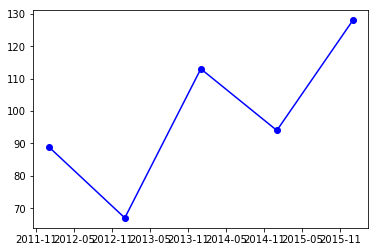

In [7]:
## Weight over time
weight = patient_results['D21']
timeline = patient_results['DateofForm']

x = timeline
y = weight
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)

In [8]:
patient_results.describe()

,D3,D21,D22a,D22b,D22c,D22d,D22e,D23a,D23b,D23c,...,Weakness_LA,Stiffness_LA,Pain_LA,Physical_Fatigue_RA,Wasting_RA,Twitching_RA,Cramping_RA,Weakness_RA,Stiffness_RA,Pain_RA
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000
mean,47727.0,98.200000,59.800000,65.000000,24.000000,61.800000,53.200000,50.000000,39.200000,41.800000,...,57.200000,53.400000,46.400000,55.000000,64.400000,57.60000,40.600000,16.400000,59.80000,44.200000
std,0.0,23.360223,34.477529,16.446884,16.673332,27.289192,27.752477,25.951879,29.201027,38.336667,...,28.481573,39.765563,28.183328,21.679483,30.096511,26.54807,20.366639,8.561542,27.93206,24.590649
min,47727.0,67.000000,11.000000,38.000000,10.000000,22.000000,19.000000,22.000000,11.000000,10.000000,...,27.000000,10.000000,14.000000,17.000000,19.000000,23.00000,8.000000,8.000000,16.00000,9.000000
25%,47727.0,89.000000,47.000000,67.000000,15.000000,51.000000,39.000000,35.000000,18.000000,16.000000,...,35.000000,13.000000,29.000000,57.000000,57.000000,50.00000,36.000000,12.000000,54.00000,30.000000
50%,47727.0,94.000000,57.000000,68.000000,15.000000,65.000000,47.000000,50.000000,30.000000,19.000000,...,53.000000,72.000000,45.000000,67.000000,65.000000,57.00000,45.000000,13.000000,62.00000,54.000000
75%,47727.0,113.000000,84.000000,69.000000,29.000000,77.000000,71.000000,52.000000,55.000000,67.000000,...,75.000000,73.000000,56.000000,67.000000,82.000000,61.00000,54.000000,19.000000,79.00000,57.000000
max,47727.0,128.000000,100.000000,83.000000,51.000000,94.000000,90.000000,91.000000,82.000000,97.000000,...,96.000000,99.000000,88.000000,67.000000,99.000000,97.00000,60.000000,30.000000,88.00000,71.000000


In [9]:
## Calculating Mental Health assume all mental health categories are weighted equally
### Mental Health
#  - D23a = Depression
#  - D23b = Anxiety
#  - D23c = Enthusiasm
#  - D23d = Mental Fatigue
patient_results['mentalHealth'] = (patient_results.D23a + patient_results.D23b + 
                                   patient_results.D23c + patient_results.D23d)/4
patient_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 217
Data columns (total 48 columns):
D3                     5 non-null int64
DateofForm             5 non-null datetime64[ns]
D21                    5 non-null int64
D22a                   5 non-null int64
D22b                   5 non-null int64
D22c                   5 non-null int64
D22d                   5 non-null int64
D22e                   5 non-null int64
D23a                   5 non-null int64
D23b                   5 non-null int64
D23c                   5 non-null int64
D23d                   5 non-null int64
D24a                   5 non-null int64
D24b                   5 non-null int64
D24c                   5 non-null int64
D25a                   5 non-null int64
D25b                   5 non-null int64
D25c                   5 non-null int64
D25d                   5 non-null int64
Physical_Fatigue_LL    5 non-null int64
Wasting_LL             5 non-null int64
Twitching_LL           5 non-null int64
Cramping

In [10]:
## calculating saliva and swallowing assuming all categories are weighted equally
### Saliva and swallowing
#  - D22a  = Saliva
#  - D22b = Food variety
#  - D22c = Food texture
#  - D22d = Amount of food consumed
#  - D22e = Supplements
patient_results['salivaSwallowing'] = (patient_results.D22a + patient_results.D22b + 
                                       patient_results.D22c + patient_results.D22d + 
                                       patient_results.D22e)/5


In [11]:
## Calculating the breathing category assuming all categories are considered equal
### Breathing
#  - D24a = Overall Breathing
#  - D24b = Shortness of breath 
#  - D24c = Breathing while lying flat
patient_results['breathing'] = (patient_results.D24a + patient_results.D24b + patient_results.D24c)/3


In [12]:
## calculating appetite and digestive system assuming all categories are weighted equally
### Appetite and digestive health
#  - D25a = Appetite
#  - D25b = Nausea
#  - D25c = Bloating/Gas
#  - D25d = Constipation

patient_results['appetite'] = (patient_results.D25a + patient_results.D25b + 
                               patient_results.D25c + patient_results.D25d) / 4

In [13]:
## physical attributes assuming all are equal

''' Physical
  - Physical_Fatigue_LL
  - Wasting_LL
  - Twitching_LL
  - Cramping_LL  
  - Weakness_LL
  - Stiffness_LL
  - Pain_LL
  - Physical_Fatigue_RL
  - Wasting_RL
  - Twitching_RL
  - Cramping_RL
  - Weakness_RL
  - Stiffness_RL
  - Pain_RL
  - Physical_Fatigue_LA
  - Wasting_LA
  - Twitching_LA
  - Cramping_LA
  - Weakness_LA
  - Stiffness_LA
  - Pain_LA
  - Physical_Fatigue_RA
  - Wasting_RA
  - Twitching_RA
  - Cramping_RA
  - Weakness_RA
  - Stiffness_RA
  - Pain_RA '''

patient_results['Pycical_Total'] = (patient_results.Physical_Fatigue_LL + patient_results.Wasting_LL + 
                                    patient_results.Twitching_LL + patient_results.Cramping_LL + patient_results.Weakness_LL + 
                                    patient_results.Stiffness_LL + patient_results.Pain_LL + patient_results.Physical_Fatigue_RL +
                                    patient_results.Wasting_RL + patient_results.Twitching_RL + patient_results.Cramping_RL +
                                    patient_results.Weakness_RL + patient_results.Stiffness_RL + patient_results.Pain_RL + 
                                    patient_results.Physical_Fatigue_LA + patient_results.Wasting_LA + 
                                    patient_results.Twitching_LA + patient_results.Cramping_LA + patient_results.Weakness_LA + 
                                    patient_results.Stiffness_LA + patient_results.Pain_LA + 
                                    patient_results.Physical_Fatigue_RA + patient_results.Wasting_RA + 
                                    patient_results.Twitching_RA + patient_results.Cramping_RA + patient_results.Weakness_RA +
                                    patient_results.Stiffness_RA + patient_results.Pain_RA) / 21

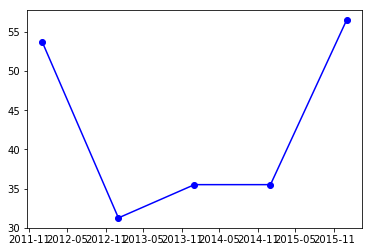

In [14]:
## Mental Health over time

mentalHealth = patient_results['mentalHealth']
timeline = patient_results['DateofForm']

x = timeline
y = mentalHealth
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)
#plt.title('Mental Health Over time')


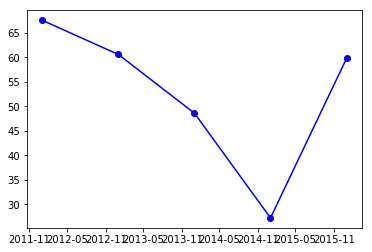

In [15]:
## Mental Health over time

salivaSwallowing = patient_results['salivaSwallowing']
timeline = patient_results['DateofForm']

x = timeline
y = salivaSwallowing
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)
#plt.title('Saliva and Swall')

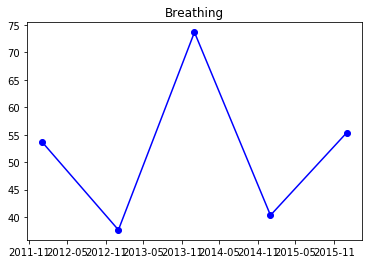

In [16]:
breathing = patient_results['breathing']
timeline = patient_results['DateofForm']

x = timeline
y = breathing
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)
plt.title('Breathing')

In [17]:
def get_info(patient, column):
    global sampleData
    minimum = 200
    maximum = 0
    mean = -1
    for index, row in sampleData.iterrows():
    # Choosing categorical variables to encode
        if row['D3']==patient:
            if minimum > row[column]:
                minimum = row[column]
            if maximum < row[column]:
                maximum = row[column]
            if mean == -1:
                mean = row[column]
                mean = (mean + row[column])/2
    return(minimum, maximum, mean)
       

        

In [18]:
get_info(47727, 'D21')

(67, 128, 89.0)

## TO DO
 - Detecting change in the values of plus or minus 20%
 - Create the physical attribute testing fields
 - Physical_Fatigue_LL	Wasting_LL	Twitching_LL	Cramping_LL	Weakness_LL	Stiffness_LL	Pain_LL
 